In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

/Users/ianforrest/anaconda3/envs/nn/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ianforrest/anaconda3/envs/nn/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ianforrest/anaconda3/envs/nn/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ianforrest/anaconda3/envs/nn/lib/pyt

In [2]:
# define neural network class
class TwoLayerNetSimple(object):
    """
    Simple two fully connected layers net with simple loss function loss = y - y_pred
    """
    def __init__(self, input_dim = 3, hidden_dim = 100, output_dim = 1, iterations=10000):
        self.iterations = iterations

        # initiailize weights
        self.W1 = np.random.rand(input_dim, hidden_dim) / np.sqrt(input_dim)
        self.b1 = np.zeros(hidden_dim)
        self.W2 = np.random.rand(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.b2 = np.zeros(output_dim)
        self.loss = []
        pass
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def dsigmoid(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def affine_forward(self, x, w, b):
        scores = x.dot(w) + b
        cache = (x, w, b)
        return scores, cache
    
    def affine_backward(self, dout, cache):
        x, w, b = cache
        dx = dout.dot(w.T)#.reshape(x.shape)
        dw = x.T.dot(dout)
        db = np.sum(dout, axis=0)
        return dx, dw, db
        
    def fit(self, x, y):
        for i in range(self.iterations):            
            # forward prop
            a1, cache_l1 = self.affine_forward(x, self.W1, self.b1)
            out_l1 = self.sigmoid(a1)
            a2, cache_l2 = self.affine_forward(out_l1, self.W2, self.b2)

            # scoring
            out_l2 = self.sigmoid(a2)
            loss = y - out_l2
            self.loss.append(np.sqrt(np.sum(loss**2)))

            # back prop
            da2 = loss * self.dsigmoid(out_l2)
            dout_l2, dW2, db2 = self.affine_backward(da2, cache_l2)
            da1 = dout_l2 * self.dsigmoid(out_l1)
            _, dW1, db1 = self.affine_backward(da1, cache_l1)

            # gradient update
            self.W1 += dW1
            self.b1 += db1
            self.W2 += dW2
            self.b2 += db2
        pass
        
    def predict(self, x):
        x = np.array(x)
        a1, _ = self.affine_forward(x.reshape(1, -1), self.W1, self.b1)
        out1 = self.sigmoid(a1)
        scores = self.affine_forward(out1, self.W2, self.b2)
        out = self.sigmoid(scores[0])
        return out

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [3]:
# create dataframe
data = {
    'x1': [0, 0, 1, 0, 1, 1, 0],
    'x2': [0, 1, 0, 1, 0, 1, 0],
    'x3': [1, 1, 1, 0, 0, 1, 0],
    'y' : [0, 1, 1, 1, 1, 0, 0]
}

df = pd.DataFrame.from_dict(data).astype('int')
df.head()

,x1,x2,x3,y
0,0,0,1,0
1,0,1,1,1
2,1,0,1,1
3,0,1,0,1
4,1,0,0,1


In [4]:
# Split features, and target from df

X = df[['x1', 'x2', 'x3']].to_numpy()
y = df['y'].to_numpy().reshape(-1, 1)

X.shape, y.shape

((7, 3), (7, 1))

In [5]:
# define neural network
nn = TwoLayerNetSimple(input_dim=3, hidden_dim=100, output_dim=1, iterations=10000)
nn.fit(X, y)

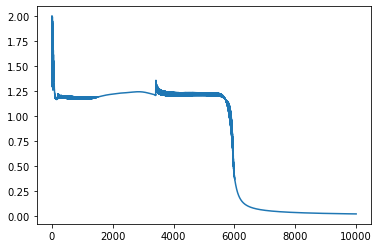

In [6]:
# plot loss as iterations increase
plt.plot(np.array(nn.loss));

In [7]:
# display results
test1 = np.array([0,0,1])
test2 = np.array([0,1,1])
test3 = np.array([1,0,1])
test4 = np.array([0,1,0])
test5 = np.array([1,0,0])
test6 = np.array([1,1,1])
test7 = np.array([0,0,0])
print("{}".format(test1), nn.predict(test1))
print("{}".format(test2), nn.predict(test2))
print("{}".format(test3), nn.predict(test3))
print("{}".format(test4), nn.predict(test4))
print("{}".format(test5), nn.predict(test5))
print("{}".format(test6), nn.predict(test6))
print("{}".format(test6), nn.predict(test6))
print(y)

[0 0 1] [[3.99649346e-05]]
[0 1 1] [[0.9980769]]
[1 0 1] [[0.98965014]]
[0 1 0] [[0.98959326]]
[1 0 0] [[0.99787135]]
[1 1 1] [[0.00960479]]
[1 1 1] [[0.00960479]]
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]


## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


### Parts
1. Gathering & Transforming the Data
2. Making MNIST a Binary Problem
3. Estimating your Neural Network (the part you focus on)

### Gathering the Data 

`keras` has a handy method to pull the mnist dataset for you. You'll notice that each observation is a 28x28 arrary which represents an image. Although most Neural Network frameworks can handle higher dimensional data, that is more overhead than necessary for us. We need to flatten the image to one long row which will be 784 values (28X28). Basically, you will be appending each row to one another to make on really long row. 

In [8]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [9]:
# input image dimensions
img_rows, img_cols = 28, 28

In [10]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [12]:
# Now the data should be in a format you're more familiar with
x_train.shape

(60000, 784)

### Making MNIST a Binary Problem 
MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simply the problem for now: Zero or all else.

In [13]:
import numpy as np

y_temp = np.zeros(y_train.shape)
y_temp[np.where(y_train == 0.0)[0]] = 1
y_train = y_temp

y_temp = np.zeros(y_test.shape)
y_temp[np.where(y_test == 0.0)[0]] = 1
y_test = y_temp

In [16]:
# A Nice Binary target for ya to work with
y_train

array([0., 1., 0., ..., 0., 0., 0.])

### Estimating Your `net

In [15]:
##### Your Code Here #####
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define keras model
# https://keras.io/getting-started/sequential-model-guide/
model = Sequential()  # Sequential model is a linear stack of layers
# https://keras.io/layers/core/
model.add(Dense(32, input_dim=784, activation='relu'))  # Dense - one of keras core layers (along with Dropout, Activation, & Flatten)
                                                        # activation specifies the activation function
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
# https://keras.io/models/sequential/
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # loss specifies the loss function to minimize

# fit the keras model
# https://keras.io/models/sequential/
model.fit(x_train, y_train, epochs=150, batch_size=128, verbose=False)  # batch size - number of samples per gradient

# evaluate the keras model
# https://keras.io/models/sequential/
_, accuracy = model.evaluate(x_test, y_test)  # returns loss values & metric values
print('Accuracy: %.2f' % (accuracy*100))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
10000/10000 [==============================] - 0s 29us/sample - loss: 0.0224 - acc: 0.9979
Accuracy: 99.79


## Stretch Goals: 

- Make MNIST a multiclass problem using cross entropy & soft-max
- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?